# Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split

titanic= pd.read_csv('/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

#Cleaning continuous features

Since the age were missing at random (as seen in Data Cleaning file), therefore we will fill the missing values by mean

In [2]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

Combining SibSp & Parch as they have same relationships with target variable (seen in Data Cleaning file)

<Figure size 432x288 with 0 Axes>

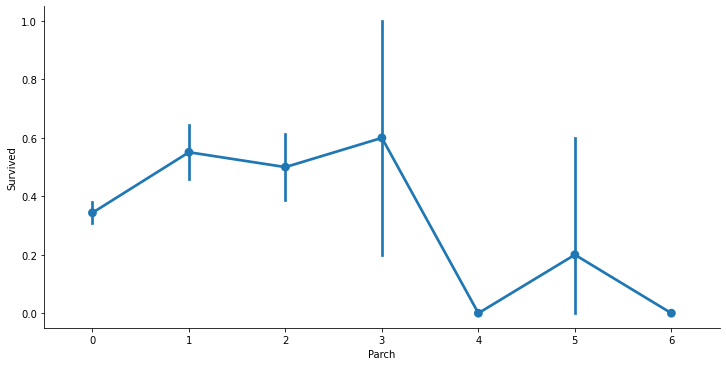

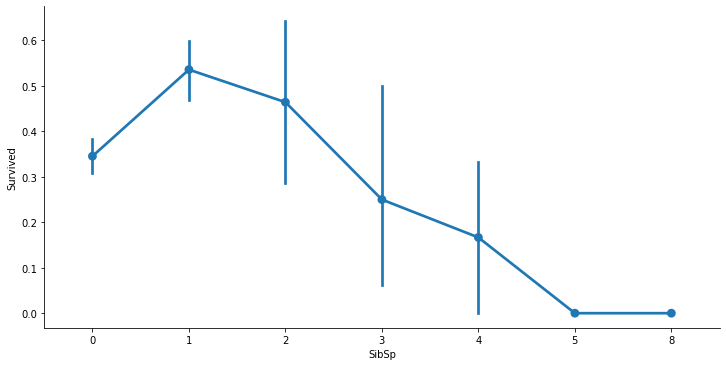

In [4]:
for i, col in enumerate(['Parch','SibSp']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=titanic, kind='point', aspect=2,)

In [5]:
titanic['Family_count']=titanic['SibSp']+titanic['Parch']

#Dropping unnecessary variables

In [6]:
titanic.drop(['PassengerId','SibSp','Parch'],axis=1,inplace=True)

In [7]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


#Cleaning categorical features

Unlike age, cabin is not missing at random. (seen in Data Cleaning file)

In [8]:
titanic['Cabin_indicator']=np.where(titanic['Cabin'].isnull(), 0, 1)

Converting sex to numeric

In [9]:
gender_numeric={'male': 0, 'female': 1}
titanic['Sex']=titanic['Sex'].map(gender_numeric)

#Dropping unnecessary columns

In [10]:
titanic.drop(['Cabin','Embarked','Name','Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_indicator
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


# Splitting data into Train, Validation & Test sets

In [11]:
features=titanic.drop('Survived',axis=1)
labels=titanic['Survived']

X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [12]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels),2))            # For verifying the train, test, validation sets size

0.6
0.2
0.2


In [13]:
X_train.to_csv('/train_features.csv', index=False)
X_test.to_csv('/test_features.csv', index=False)
X_val.to_csv('/val_features.csv', index=False)

y_train.to_csv('/train_labels.csv', index=False)
y_test.to_csv('/test_labels.csv', index=False)
y_val.to_csv('/val_labels.csv', index=False)

In [20]:
train_features=pd.read_csv('/train_features.csv')
train_labels=pd.read_csv('/train_labels.csv')

val_features=pd.read_csv('/val_features.csv')
val_labels=pd.read_csv('/val_labels.csv')

test_features=pd.read_csv('/test_features.csv')
test_labels=pd.read_csv('/test_labels.csv')



# Fitting single basic model using cross validation

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [21]:
rf=RandomForestClassifier()

# 5-fold cross validation 
scores= cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5)     #converting column vector into array - y_train.values.ravel() Thus, warning will not come

In [22]:
scores

array([0.80373832, 0.8411215 , 0.79439252, 0.79439252, 0.81132075])

^ helps in getting the range of accuracy for different subsets of data

# Hyperparamter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
def print_results(results):
    print('Best Paramters: {}\n'.format(results.best_params_))
    
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std * 2,3), params))
        

This will help print accuracy score & standard deviation of these accuracy score for every hyperparamters combination across all 5-fold 

This is done to select the optimal hyperparamter combination

In [25]:
rf= RandomForestClassifier()
parameters = {
    'n_estimators': [5, 15, 100],         # how many individual decision trees we want in this estimator
    'max_depth':[2, 10, 20, None]         #how deep our decision trees ; None will allow decision tree to go as deep as possible until it reaches some stopping point
}
cv= GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)          #take each paramter combination - levels of paramters * levels of depth=  3 *4 = 12 here, and for each combination, it is building 5-fold validation


Best Paramters: {'max_depth': 10, 'n_estimators': 100}

0.781 (+/-0.096) for {'max_depth': 2, 'n_estimators': 5}
0.803 (+/-0.07) for {'max_depth': 2, 'n_estimators': 15}
0.798 (+/-0.125) for {'max_depth': 2, 'n_estimators': 100}
0.813 (+/-0.048) for {'max_depth': 10, 'n_estimators': 5}
0.811 (+/-0.054) for {'max_depth': 10, 'n_estimators': 15}
0.828 (+/-0.074) for {'max_depth': 10, 'n_estimators': 100}
0.822 (+/-0.031) for {'max_depth': 20, 'n_estimators': 5}
0.794 (+/-0.04) for {'max_depth': 20, 'n_estimators': 15}
0.811 (+/-0.029) for {'max_depth': 20, 'n_estimators': 100}
0.792 (+/-0.042) for {'max_depth': None, 'n_estimators': 5}
0.8 (+/-0.072) for {'max_depth': None, 'n_estimators': 15}
0.811 (+/-0.036) for {'max_depth': None, 'n_estimators': 100}


# Evaluating on validation set

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [31]:
#Evaluating for top 3 best parameters model

rf1=RandomForestClassifier(n_estimators=100, max_depth=10)    #Best parameters value
rf1.fit(train_features, train_labels.values.ravel())

rf2=RandomForestClassifier(n_estimators=5, max_depth=20)   
rf2.fit(train_features, train_labels.values.ravel())

rf3=RandomForestClassifier(n_estimators=5, max_depth=10)    
rf3.fit(train_features, train_labels.values.ravel())



RandomForestClassifier(max_depth=10, n_estimators=5)

In [32]:
for model in [rf1,rf2,rf3]:
    y_prediction=model.predict(val_features)
    accuracy= round(accuracy_score(val_labels,y_prediction),3)
    precision= round(precision_score(val_labels,y_prediction),3)
    recall= round(recall_score(val_labels,y_prediction),3)
    print ('Max depth: {} / # of est: {} -- A: {} / P: {} / R: {}'.format(model.max_depth,
                                                                         model.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))
    

Max depth: 10 / # of est: 100 -- A: 0.827 / P: 0.857 / R: 0.711
Max depth: 20 / # of est: 5 -- A: 0.838 / P: 0.841 / R: 0.763
Max depth: 10 / # of est: 5 -- A: 0.81 / P: 0.862 / R: 0.658


# Selecting final model and evaluating on test data

In [33]:
y_prediction=rf2.predict(test_features)
accuracy= round(accuracy_score(test_labels,y_prediction),3)
precision= round(precision_score(test_labels,y_prediction),3)
recall= round(recall_score(test_labels,y_prediction),3)
print ('Max depth: {} / # of est: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                         rf2.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))
    

Max depth: 20 / # of est: 5 -- A: 0.775 / P: 0.719 / R: 0.631
